In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = r"C:\Users\shara\OneDrive\Desktop\ML ACTS\ML-Projects\PCA\Wine.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())
print("\n\nMissing values:\n\n", df.isnull().sum())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [ ]:
X = df.drop(columns=['Customer_Segment']) #as PCA is UNSUPERVISED , PCA does not use labels, it only look at feature variance.
y = df['Customer_Segment']   # y ONLY for visualization later

X_values = X.values # Convert Features to NumPy Array

In [16]:
# standardization
mean = np.mean(X_values, axis=0)
std = np.std(X_values, axis=0)

X_std = (X_values - mean) / std
print("Mean after standardization:\n", np.mean(X_std, axis=0)) # ~ 0
print("\nStd after standardization:\n", np.std(X_std, axis=0)) # ~ 1

Mean after standardization:
 [-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16  2.49488320e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16]

Std after standardization:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


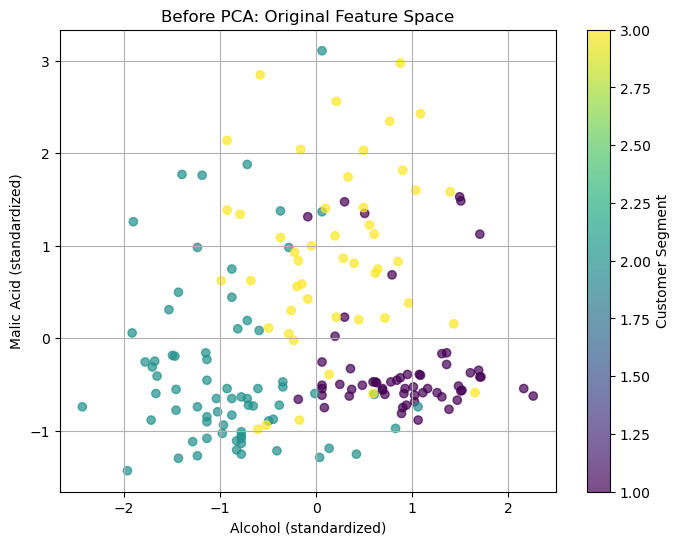

In [ ]:
# Before PCA plot 
plt.figure(figsize=(8,6))
plt.scatter(X_std[:,0], X_std[:,1],
            c=y, cmap='viridis', alpha=0.7) # y contains values like 1, 2, 3 , each number maps to different colour
                                            # viridis is a perceptually uniform colormap, cmap tells matplot to convert no to colours  
plt.xlabel("Alcohol (standardized)")
plt.ylabel("Malic Acid (standardized)")
plt.title("Before PCA: Original Feature Space")
plt.colorbar(label="Customer Segment") # This creates the legend for colours.
plt.grid(True)
plt.show()

In [ ]:
# Compute Covariance Matrix (MANUALLY)
n_samples = X_std.shape[0] # attains all sample from X(sample,feature)

cov_matrix = (X_std.T @ X_std) / (n_samples - 1) # @ = Matrix Dot Product results to (n_features, n_features)

print("Covariance Matrix shape:", cov_matrix.shape)

Covariance Matrix shape: (13, 13)


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) #Eigenvectors → directions
print("Eigenvalues:\n", eigenvalues)# Eigenvalues → variance along directions

# Sort Eigenvalues (Descending Order)
idx = np.argsort(eigenvalues)[::-1] # arg returns input , Largest eigenvalue index first

eigenvalues_sorted = eigenvalues[idx] # This ranking defines principal components order.
eigenvectors_sorted = eigenvectors[:, idx] # envectors are stored column-wise. 


Eigenvalues:
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


In [ ]:
# explained_variance_ratio - It computes how much fraction of total variance each principal component explains.
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted) 

print("Explained Variance Ratio:\n", explained_variance_ratio)
print("\nCumulative Explained Variance:\n", np.cumsum(explained_variance_ratio)) # answers - “How many components do I need to keep to retain X% variance?”

Explained Variance Ratio:
 [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

Cumulative Explained Variance:
 [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


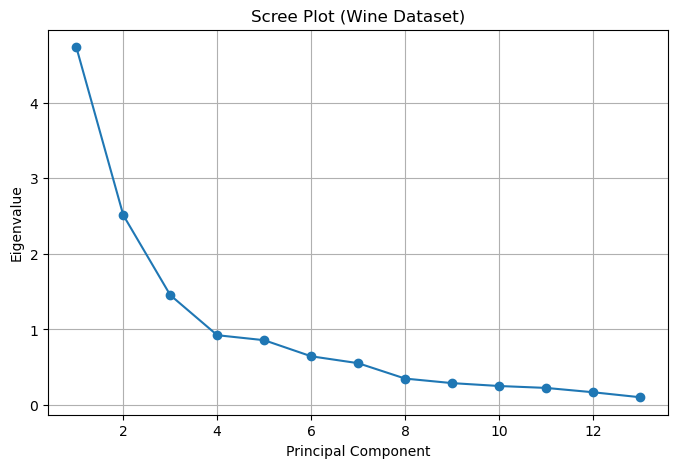

In [ ]:
import matplotlib.pyplot as plt    # Principal Component vs Variance

plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues_sorted) + 1), # PC1, PC2, PC3, ...
         eigenvalues_sorted, # y-axis values - Variance explained by each PC
         marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot (Wine Dataset)")
plt.grid(True)
plt.show()
# Scree Plot (Variance Visualization) - tells How quickly variance decreases
# Look for the elbow → optimal components.

In [ ]:
k = 2 # Select Number of Components (k = 2)
W = eigenvectors_sorted[:, :k]

# Project Data onto Principal Components
X_pca = X_std @ W

print("Before PCA:", X_std.shape)
print("After PCA:", X_pca.shape) 

                    #### Dimensionality reduced 13 → 2

Before PCA: (178, 13)
After PCA: (178, 2)


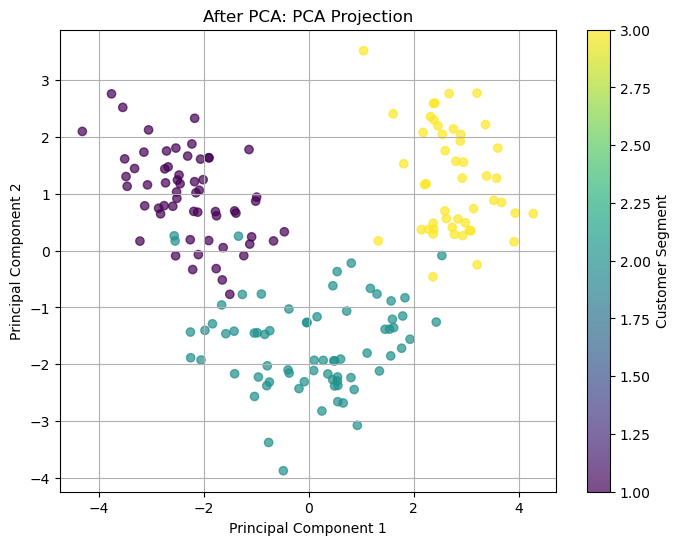

In [25]:
# After PCA plot 
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("After PCA: PCA Projection")
plt.colorbar(label="Customer Segment")
plt.grid(True)
plt.show()